Stock Portfolio Creator

In [104]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [105]:
symbols_input = input("Enter the stock symbols separated by commas: ")

# Split the input string into a list of symbols and remove spaces
symbols = [symbol.strip() for symbol in symbols_input.split(',')]

print(symbols)
year = 5
print(year)

years = 3


['GOOG', 'AAPL', 'AMZN', 'MSFT', 'TSLA']
5


In [106]:
import yfinance as yf
import pandas as pd

def fetch_stock_info(symbols):
    stock_info_list = []
    
    for symbol in symbols:
        # Create a Ticker object for the stock
        stock_data = yf.Ticker(symbol)
        
        # Fetch dividend, sector, and market cap information for the stock
        dividends = stock_data.dividends
        sector = stock_data.info.get('sector')
        market_cap = stock_data.info.get('marketCap')

        # Check if market_cap is not None before performing conversion
        if market_cap is not None:
            market_cap_million = f"${market_cap / 1e6:.2f}M"
        else:
            market_cap_million = None

        # Get the most recent dividend if available
        dividend_amount = dividends.tail(1).iloc[0] if not dividends.empty else None

        # Get the current stock price
        current_price = stock_data.history(period='1d')['Close'].iloc[-1]

        # Create a DataFrame with the fetched information for the stock
        stock_info_df = pd.DataFrame({
            'Stock': [symbol],
            'Dividend': [dividend_amount],
            'Sector': [sector],
            'Market Cap (Million)': [market_cap_million],
            'Stock Price': [current_price]
        })

        stock_info_list.append(stock_info_df)
    
    # Combine all DataFrames into one
    combined_stock_info_df = pd.concat(stock_info_list, ignore_index=True)
    
    return combined_stock_info_df

# Call the function to fetch stock information for the provided symbols
combined_stock_info = fetch_stock_info(symbols)

# Print the combined stock information table
print(combined_stock_info)


  Stock  Dividend                  Sector Market Cap (Million)  Stock Price
0  GOOG       NaN  Communication Services         $2179094.41M   177.070007
1  AAPL      0.25              Technology         $3003489.98M   195.869995
2  AMZN       NaN       Consumer Cyclical         $1886508.42M   181.279999
3  MSFT      0.75              Technology         $3151373.80M   424.010010
4  TSLA       NaN       Consumer Cyclical          $558109.95M   175.000000


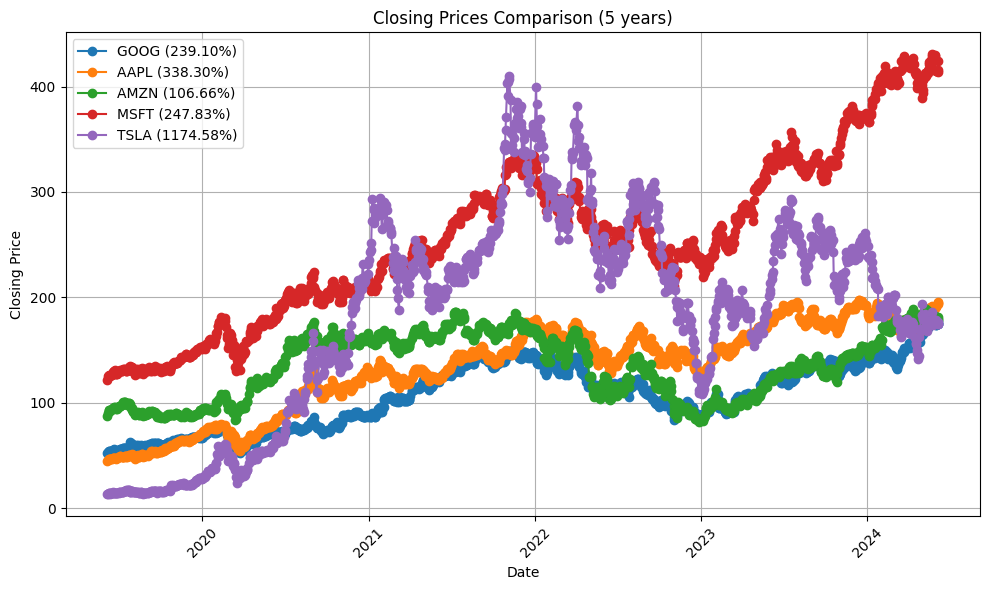

In [107]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_percentage_change(symbol, year):
    # Create a Ticker object for the stock
    stock_data = yf.Ticker(symbol)
    
    # Fetch historical data for the stock
    data = stock_data.history(period=f"{year}y")
    
    # Calculate percentage change in closing price over the specified years for the stock
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    percentage_change = ((end_price - start_price) / start_price) * 100
    
    return percentage_change, data

def plot_closing_prices(symbols, year):
    plt.figure(figsize=(10, 6))
    for symbol in symbols:
        # Calculate percentage change and fetch historical data for the stock
        percentage_change, data = calculate_percentage_change(symbol, year)
        
        # Plot closing prices for the stock
        plt.plot(data.index, data['Close'], marker='o', linestyle='-', label=f"{symbol} ({percentage_change:.2f}%)")

    plt.title(f"Closing Prices Comparison ({year} years)")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot closing prices for the provided symbols over the specified number of years
plot_closing_prices(symbols, year)


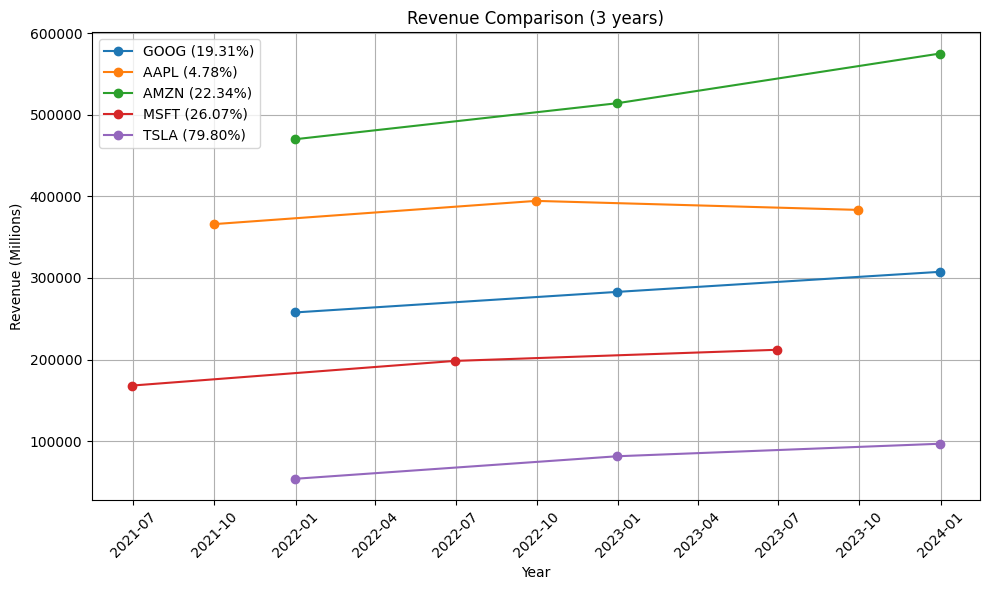

In [108]:


def fetch_income_statement(symbol, years):
    # Create a Ticker object for the stock
    stock_data = yf.Ticker(symbol)
    
    # Fetch income statement data for the stock for the past specified number of years
    income_statement = stock_data.financials.loc['Total Revenue'][:years]
    # Convert revenue to millions for the stock
    revenue_millions = income_statement / 1e6
    
    return revenue_millions

def plot_revenue_comparison(symbols, years):
    plt.figure(figsize=(10, 6))
    for symbol in symbols:
        # Fetch income statement data for the stock and calculate percentage change in revenue
        revenue_millions = fetch_income_statement(symbol, years)
        start_rev = revenue_millions.iloc[-1]  # Revenue 2 years ago
        end_rev = revenue_millions.iloc[0]     # Latest revenue
        percentage_change = ((end_rev - start_rev) / start_rev) * 100
        
        # Plot revenue for the stock
        plt.plot(revenue_millions.index, revenue_millions, marker='o', linestyle='-', label=f"{symbol} ({percentage_change:.2f}%)")

    plt.title(f"Revenue Comparison ({years} years)")
    plt.xlabel("Year")
    plt.ylabel("Revenue (Millions)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Plot revenue comparison for the provided symbols over the specified number of years
plot_revenue_comparison(symbols, years)



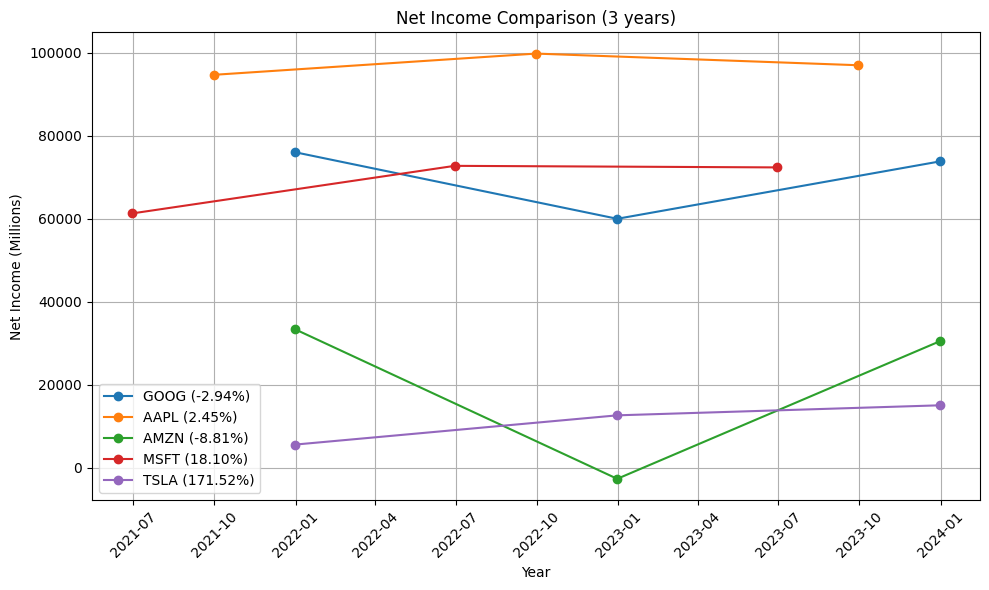

In [109]:
def fetch_net_income(symbol, years):
    # Create a Ticker object for the stock
    stock_data = yf.Ticker(symbol)
    
    # Fetch net income data for the stock for the past two years
    net_income = stock_data.financials.loc['Net Income'][:years]
    
    # Convert net income to millions for the stock
    net_income_millions = net_income / 1e6
    
    return net_income_millions

def plot_net_income_comparison(symbols, years):
    plt.figure(figsize=(10, 6))
    for symbol in symbols:
        # Fetch net income data for the stock and calculate percentage change in net income
        net_income_millions = fetch_net_income(symbol, years)
        start_income = net_income_millions.iloc[-1]  # Net Income two years ago
        end_income = net_income_millions.iloc[0]     # Latest net income
        percentage_change = ((end_income - start_income) / start_income) * 100
        
        # Plot net income for the stock
        plt.plot(net_income_millions.index, net_income_millions, marker='o', linestyle='-', label=f"{symbol} ({percentage_change:.2f}%)")

    plt.title(f"Net Income Comparison ({years} years)")
    plt.xlabel("Year")
    plt.ylabel("Net Income (Millions)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()



# Plot net income comparison for the provided symbols over the past two years
plot_net_income_comparison(symbols, years)



In [110]:
import yfinance as yf

def fetch_institutional_holders(symbol):
    # Create a Ticker object for the stock
    stock_data = yf.Ticker(symbol)
    
    # Fetch institutional holders data for the stock
    institutional_holders = stock_data.get_institutional_holders()
    
    return institutional_holders

def print_institutional_holders(symbols):
    for symbol in symbols:
        # Fetch and print institutional holders data for the stock
        institutional_holders = fetch_institutional_holders(symbol)
        print(f"Institutional Holders for {symbol}:")
        print(institutional_holders)
        print("\n")


# Print institutional holders data for the provided symbols
print_institutional_holders(symbols)




/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


Institutional Holders for GOOG:
  Date Reported                           Holder  pctHeld     Shares  \
0    2023-06-30               Vanguard Group Inc   0.0722  413428897   
1    2023-06-30                   Blackrock Inc.   0.0627  359175260   
2    2023-06-30         State Street Corporation   0.0333  190859687   
3    2023-06-30                         FMR, LLC   0.0202  115885929   
4    2023-06-30    Price (T.Rowe) Associates Inc   0.0197  112847829   
5    2023-06-30    Geode Capital Management, LLC   0.0172   98217816   
6    2023-06-30        JP Morgan Chase & Company   0.0151   86237704   
7    2023-06-30  Capital International Investors   0.0141   80767333   
8    2023-06-30                   Morgan Stanley   0.0133   75921937   
9    2023-06-30       Northern Trust Corporation   0.0098   55994124   

         Value  
0  50012493670  
1  43449431202  
2  23088296336  
3  14018720831  
4  13651201874  
5  11881409201  
6  10432175052  
7   9770424273  
8   9184276718  
9   6

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


Institutional Holders for AAPL:
  Date Reported                             Holder  pctHeld      Shares  \
0    2023-06-30                 Vanguard Group Inc   0.0834  1303688506   
1    2023-06-30                     Blackrock Inc.   0.0665  1039640859   
2    2023-06-30            Berkshire Hathaway, Inc   0.0586   915560382   
3    2023-06-30           State Street Corporation   0.0370   578897858   
4    2023-06-30                           FMR, LLC   0.0196   307066638   
5    2023-06-30      Geode Capital Management, LLC   0.0186   291538165   
6    2023-06-30      Price (T.Rowe) Associates Inc   0.0145   226650943   
7    2023-06-30                     Morgan Stanley   0.0131   204714950   
8    2022-12-31  Norges Bank Investment Management   0.0107   167374278   
9    2023-06-30         Northern Trust Corporation   0.0105   164536073   

          Value  
0  252876459508  
1  201659137420  
2  177591247296  
3  112288817516  
4   59561715772  
5   56549657865  
6   43963483413 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


In [123]:
import yfinance as yf
import pandas as pd

# Print the combined stock information table
print("The Results")
print(f'{combined_stock_info}\n')

def calculate_percentage_change(symbol, year):
    # Create a Ticker object for the stock
    stock_data = yf.Ticker(symbol)
    
    # Fetch historical data for the stock
    data = stock_data.history(period=f"{year}y")
    
    # Calculate percentage change in closing price over the specified years for the stock
    start_price = data['Close'].iloc[0]
    end_price = data['Close'].iloc[-1]
    percentage_change = ((end_price - start_price) / start_price) * 100
    
    return percentage_change

def fetch_income_statement(symbol, years):
    # Create a Ticker object for the stock
    stock_data = yf.Ticker(symbol)
    
    # Fetch income statement data for the stock for the past specified number of years
    income_statement = stock_data.financials.loc['Total Revenue'][:years]
    
    # Convert revenue to millions for the stock
    revenue_millions = income_statement / 1e6
    
    # Calculate percentage change in revenue
    start_rev = revenue_millions.iloc[-1]  # Revenue 2 years ago
    end_rev = revenue_millions.iloc[0]     # Latest revenue
    percentage_change = ((end_rev - start_rev) / start_rev) * 100
    
    return percentage_change

def fetch_net_income(symbol, years):
    # Create a Ticker object for the stock
    stock_data = yf.Ticker(symbol)
    
    # Fetch net income data for the stock for the past specified number of years
    net_income = stock_data.financials.loc['Net Income'][:years]
    
    # Convert net income to millions for the stock
    net_income_millions = net_income / 1e6
    
    # Calculate percentage change in net income
    start_income = net_income_millions.iloc[-1]  # Net Income two years ago
    end_income = net_income_millions.iloc[0]     # Latest net income
    percentage_change = ((end_income - start_income) / start_income) * 100
    
    return percentage_change

# Add the rest of your code here

# Create empty dictionaries to store percentage changes for each metric
price_changes = {}
revenue_changes = {}
income_changes = {}

# Calculate and store percentage change in closing prices for the provided symbols over the specified number of years
for symbol in symbols:
    percentage_change_price = calculate_percentage_change(symbol, year)
    price_changes[symbol] = percentage_change_price

# Calculate and store revenue comparison for the provided symbols over the specified number of years
for symbol in symbols:
    percentage_change_rev = fetch_income_statement(symbol, years)
    revenue_changes[symbol] = percentage_change_rev

# Calculate and store net income comparison for the provided symbols over the specified number of years
for symbol in symbols:
    percentage_change_income = fetch_net_income(symbol, years)
    income_changes[symbol] = percentage_change_income

# Rank symbols based on highest change to lowest change for each metric
ranked_price = sorted(price_changes.items(), key=lambda x: x[1], reverse=True)
ranked_revenue = sorted(revenue_changes.items(), key=lambda x: x[1], reverse=True)
ranked_income = sorted(income_changes.items(), key=lambda x: x[1], reverse=True)

# Print the ranked symbols based on percentage change in closing price
print("Ranking based on percentage change in closing price:")
for symbol, change in ranked_price:
    print(f"{symbol}: {change:.2f}%")

# Print the ranked symbols based on percentage change in revenue
print("\nRanking based on percentage change in revenue:")
for symbol, change in ranked_revenue:
    print(f"{symbol}: {change:.2f}%")

# Print the ranked symbols based on percentage change in net income
print("\nRanking based on percentage change in net income:")
for symbol, change in ranked_income:
    print(f"{symbol}: {change:.2f}%")


The Results
  Stock  Dividend                  Sector Market Cap (Million)  Stock Price
0  GOOG       NaN  Communication Services         $2179094.41M   177.070007
1  AAPL      0.25              Technology         $3003489.98M   195.869995
2  AMZN       NaN       Consumer Cyclical         $1886508.42M   181.279999
3  MSFT      0.75              Technology         $3151373.80M   424.010010
4  TSLA       NaN       Consumer Cyclical          $558109.95M   175.000000

Ranking based on percentage change in closing price:
TSLA: 1174.58%
AAPL: 338.30%
MSFT: 247.83%
GOOG: 239.10%
AMZN: 106.66%

Ranking based on percentage change in revenue:
TSLA: 79.80%
MSFT: 26.07%
AMZN: 22.34%
GOOG: 19.31%
AAPL: 4.78%

Ranking based on percentage change in net income:
TSLA: 171.52%
MSFT: 18.10%
AAPL: 2.45%
GOOG: -2.94%
AMZN: -8.81%
